# Statistics and Visualisations

In [ ]:
from tools import load_settings
settings = load_settings()
NAME = settings["NAME"]

In [ ]:
import pickle
from scipy.stats import ttest_ind
import pandas as pd
from eventstudystatistics import grank, adjBMP
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# set logging to warning
import logging
logging.getLogger().setLevel(logging.WARNING)
# unpickle the abnormal returns
df_abnormal_returns = pd.read_pickle(f"data/{NAME}/calculate_AR_results/df_abnormal_returns.pkl")

# set plotting sizes
tick_size = 15
label_size = 20
title_size = 30
fig_height = 20

EVENT_INDEX = 0

investigation_periods = {
    "Overall": (pd.Timestamp("2018-01-01"), pd.Timestamp("2021-12-31")),
    "Pre-Pandemic": (pd.Timestamp("2018-01-01"), pd.Timestamp("2020-02-29")),
    "Pandemic": (pd.Timestamp("2020-03-01"), pd.Timestamp("2021-12-31")),
}

day_labels = np.asarray(list(range(41))) -20

CAR_repr = lambda x: str([x[0]-20, x[1]-20])
CAR_periods = {
    #"[-20, 20]": np.asarray([0, 40]), # Aussenegg advised to drop this
    "[-20, -1]": np.asarray([0, 19]),
    "[0, 20]": np.asarray([20, 40]),
    "[0, 5]": np.asarray([20, 25]),
    "[0, 1]": np.asarray([20, 21])
}
event_day = 20

with open(f"data/{NAME}/calculate_AR_results/companies.pkl", "rb") as f:
    companies = pickle.load(f)


### Having a look at all trade types together

In [ ]:
types_of_interest = ["P - Purchase", "S - Sale", "S - Sale+OE"]
counts = df_abnormal_returns.groupby(level=2).count()[0].rename({0: "N"})
print(f"relevant filings: ",counts[types_of_interest].sum())
print(counts[types_of_interest])
print(f"dropped filings ", counts.sum() - counts[types_of_interest].sum())

In [ ]:
# enable multiindex slicing
df_abnormal_returns.sort_index(level=["Company", "i", "TradeType", "event_timestamp"], ascending=True, inplace=True)

In [ ]:
for investigation_period, (start, end) in investigation_periods.items():
    a = df_abnormal_returns.loc[:,:,types_of_interest,start:end].groupby(level=[2]).mean().transpose().set_index(day_labels).plot(figsize=(fig_height, 10))
    plt.plot(day_labels, np.zeros(len(df_abnormal_returns.columns)), color="black", linewidth=0.5)
    a.set_title(f"AAR Of Selected Trade Types For The {investigation_period} Time Frame",fontsize=title_size)

    a.set_xlabel("Days", fontsize=label_size)
    a.set_ylabel("AAR", fontsize=label_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.axvline(x = EVENT_INDEX, color = 'red', label = 'DD Event time', linewidth = 1.5)
    plt.legend(fontsize=label_size)
    plt.savefig(f"data/{NAME}/visualisations/AAR_selected_tradetypes_{investigation_period}.png", dpi=600, bbox_inches='tight')

In [ ]:
for investigation_period, (start, end) in investigation_periods.items():
    a = df_abnormal_returns.loc[:,:,types_of_interest,start:end].cumsum(axis=1).groupby(level=[2]).mean().transpose().set_index(day_labels).plot(figsize=(fig_height, 10))
    plt.plot(day_labels, np.zeros(len(df_abnormal_returns.columns)), color="black", linewidth=0.5)
    a.set_title(f"CAAR Of Selected Trade Types For The {investigation_period} Time Frame",fontsize=title_size)
    a.set_xlabel("Days", fontsize=label_size)
    a.set_ylabel("CAAR", fontsize=label_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.axvline(x = EVENT_INDEX, color = 'red', label = 'DD Event time', linewidth = 1.5)
    plt.legend(fontsize=label_size)
    plt.savefig(f"data/{NAME}/visualisations/CAAR_selected_tradetypes_{investigation_period}.png", dpi=600, bbox_inches='tight')

In [ ]:
for investigation_period, (start, end) in investigation_periods.items():
    a = df_abnormal_returns.loc[:,:,types_of_interest,start:end].cumsum(axis=1).groupby(level=[2]).median().transpose().set_index(day_labels).plot(figsize=(fig_height, 10))
    plt.plot(day_labels, np.zeros(len(df_abnormal_returns.columns)), color="black", linewidth=0.5)
    a.set_title(f"MCAR Of Selected Trade Types For The {investigation_period} Time Frame",fontsize=title_size)
    a.set_xlabel("Days", fontsize=label_size)
    a.set_ylabel("MCAR", fontsize=label_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.axvline(x = EVENT_INDEX, color = 'red', label = 'DD Event time', linewidth = 1.5)
    plt.legend(fontsize=label_size)
    plt.savefig(f"data/{NAME}/visualisations/CMAR_selected_tradetypes_{investigation_period}.png", dpi=600, bbox_inches='tight')

for investigation_period, (start, end) in investigation_periods.items():
    a = df_abnormal_returns.loc[:,:,types_of_interest,start:end].groupby(level=[2]).median().transpose().set_index(day_labels).plot(figsize=(fig_height, 10))
    plt.plot(day_labels, np.zeros(len(df_abnormal_returns.columns)), color="black", linewidth=0.5)
    a.set_title(f"MAR Of Selected Trade Types For The {investigation_period} Time Frame",fontsize=title_size)
    a.set_xlabel("Days", fontsize=label_size)
    a.set_ylabel("MAR", fontsize=label_size)
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.axvline(x = EVENT_INDEX, color = 'red', label = 'DD Event time', linewidth = 1.5)
    plt.legend(fontsize=label_size)
    plt.savefig(f"data/{NAME}/visualisations/MAR_selected_tradetypes_{investigation_period}.png", dpi=600, bbox_inches='tight')

In [ ]:
df_abnormal_returns

In [ ]:
ax = df_abnormal_returns.groupby(level=[2]).sum().transpose().set_index(day_labels).plot.box(rot=90, figsize=(fig_height, 10))
ax.set_title("Boxplots of the Abnormal Returns for each Trade Type",fontsize=title_size)
ax.set_xlabel("Trade Type", fontsize=label_size)
ax.set_ylabel("Abnormal Return", fontsize=label_size)

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

plt.savefig(f"data/{NAME}/visualisations/AR_all_tradetypes_boxplot.png", dpi=600, bbox_inches='tight')

In [ ]:
types = list(set([x[2] for x in df_abnormal_returns.index]))
types

Specify the type of the trades to investigate

In [ ]:
type_ = "P - Purchase" # "S - Sale"
df_abnormal_returns_type = df_abnormal_returns.loc[:,:,type_]

The index describes the company and the index of the filing in the compnay, the columns represent the days in the event window

In [ ]:
df_abnormal_returns_type

In [ ]:
df_abnormal_returns.loc[:,:, types_of_interest].groupby(level=[2]).count()

In [ ]:
CAR = df_abnormal_returns.cumsum(axis =1).loc[:,:, types_of_interest]
CAR

In [ ]:
CAR[CAR.isnull().any(axis=1)]

In [ ]:
# Temp fix to make the rest work
##CAR = CAR[CAR.isnull().any(axis=1) == False]
##CAR
df_abnormal_returns[df_abnormal_returns.isnull().any(axis=1)]

In [ ]:
# aggregate on time axis
CAAR = CAR.groupby(level=[2]).mean().transpose()
print(CAAR.describe().to_latex())

In [ ]:
# aggregate on filings axis
results = []
index_stats = []
for type_ in types_of_interest:
    for ip in investigation_periods:
        for cp in CAR_periods:
            l, r = investigation_periods[ip]
            l_CAR, r_CAR = CAR_periods[cp]
            CAR = df_abnormal_returns.iloc[:,l_CAR:(r_CAR+1)].sum(axis =1).loc[:,:, types_of_interest]
            res = CAR.loc[:,:,type_,l:r].groupby(level=[2]).describe().transpose()
            res = res.round(4)
            res.loc["count"] = res.loc["count"].astype(int).astype(str)
            results.append(res.transpose())
            index_stats.append((type_, ip, cp))

In [ ]:
stats_df = pd.concat(results)
stats_df.index = pd.MultiIndex.from_tuples(index_stats, names=["Trade Type", "Investigation Period", "CAR period"])
print(stats_df.to_latex())

In [ ]:
CAR = df_abnormal_returns.cumsum(axis =1).loc[:,:, types_of_interest]

# Statistics


In [ ]:
# unpickle the data
df_eps = pd.read_pickle(f"data/{NAME}/calculate_AR_results/df_eps.pkl")
df_estimation_window_market_return = pd.read_pickle(f"data/{NAME}/calculate_AR_results/df_estimation_window_market_return.pkl")
df_event_window_market_return = pd.read_pickle(f"data/{NAME}/calculate_AR_results/df_event_window_market_return.pkl")

df_eps.sort_index(level=["Company", "i", "TradeType", "event_timestamp"], ascending=True, inplace=True)
df_estimation_window_market_return.sort_index(level=["Company", "i", "TradeType", "event_timestamp"], ascending=True, inplace=True)
df_event_window_market_return.sort_index(level=["Company", "i", "TradeType", "event_timestamp"], ascending=True, inplace=True)


In [ ]:
df_abnormal_returns.sort_index(level=["Company", "i", "TradeType", "event_timestamp"], ascending=True, inplace=True)
left, right = investigation_periods["Pandemic"]
df_abnormal_returns.loc[:,:,type_, left:right]

In [ ]:
# temporary cell to show data to professor
CAR_period = CAR_periods["[0, 5]"]
type_  = "P - Purchase"
left, right = investigation_periods["Pandemic"]
AR = df_abnormal_returns.loc[:,:,type_, left:right].values
eps = df_eps.loc[:,:,type_,left:right].values
R_market_estimation_window = df_estimation_window_market_return.loc[:,:,type_,left:right].values
R_market_event_window = df_event_window_market_return.loc[:,:,type_,left:right].values
adjBMP_result = adjBMP(AR, eps, R_market_estimation_window, R_market_event_window, CAR_period)
# pickle tuple
with open(f"data/{NAME}/adj-bmp_test.pkl", "wb") as f:
    pickle.dump((AR, eps, R_market_estimation_window, R_market_event_window, CAR_period), f)


In [ ]:
# P-purchases pre-event (-20,-1).
CAR_period = CAR_periods["[-20, -1]"]
type_  = "P - Purchase"
left, right = investigation_periods["Pre-Pandemic"]
CAR_ = CAR.loc[:,:,type_, left:right].values
np.median(CAR_)

In [ ]:
# ignore this approach for now, also because the sample lengths are different
ttest_results = []
ttest_index = []
from IPython.display import clear_output
for type_ in types_of_interest:
    for cp in CAR_periods.keys():

        print(type_)
        print(cp)

        left, right = investigation_periods["Pre-Pandemic"]
        l_CAR, r_CAR = CAR_periods[cp]

        AR_prepandemic = df_abnormal_returns.loc[:,:,type_,left:right].values

        sample_CAR_prepandemic = AR_prepandemic[:,l_CAR:(r_CAR+1)].sum(axis=1)
        # sample_CAR_prepandemic = R_market_event_window_prepandemic[:,l_CAR:(r_CAR+1)].cumsum(axis=1).mean(axis=0) ### TODO WAIT AUSSENEGG ANSWER HOW TO AGGREGATE FOR TTEST

        left, right = investigation_periods["Pandemic"]

        AR_pandemic = df_abnormal_returns.loc[:,:,type_,left:right].values
        sample_CAR_pandemic = AR_pandemic[:,l_CAR:(r_CAR+1)].sum(axis=1)
        # sample_CAR_pandemic = R_market_event_window_pandemic[:,l_CAR:(r_CAR+1)].cumsum(axis=1).mean(axis=0) ### TODO WAIT AUSSENEGG ANSWER HOW TO AGGREGATE FOR TTEST
        # import ttest

        ttest = ttest_ind(sample_CAR_pandemic, sample_CAR_prepandemic)

        #test_results.append((grank_result.pvalue, grank_result.statistic, adj_grank_result.pvalue, adj_grank_result.statistic, adjBMP_result.pvalue, adjBMP_result.statistic))
        ttest_results.append((ttest.pvalue, ttest.statistic))
        ttest_index.append((type_, cp))


        fig = plt.figure(figsize=(fig_height, 10))
        plt.hist(sample_CAR_prepandemic,bins = 100, alpha = 0.5)
        plt.hist(sample_CAR_pandemic,bins = 100, alpha = 0.5)
        plt.legend(["pre-pandemic", "pandemic"], fontsize = tick_size)
        plt.xlabel("CAR", fontsize=label_size)
        plt.ylabel("Count", fontsize=label_size)
        plt.title("Histogram of CARs of Pre-Pandemic and Pandemic", fontsize=title_size)
        plt.savefig(f"data/{NAME}/visualisations/histogram_CARs_pp_p_{type_}_{cp}.png")

        clear_output(wait=True)
        plt.show()

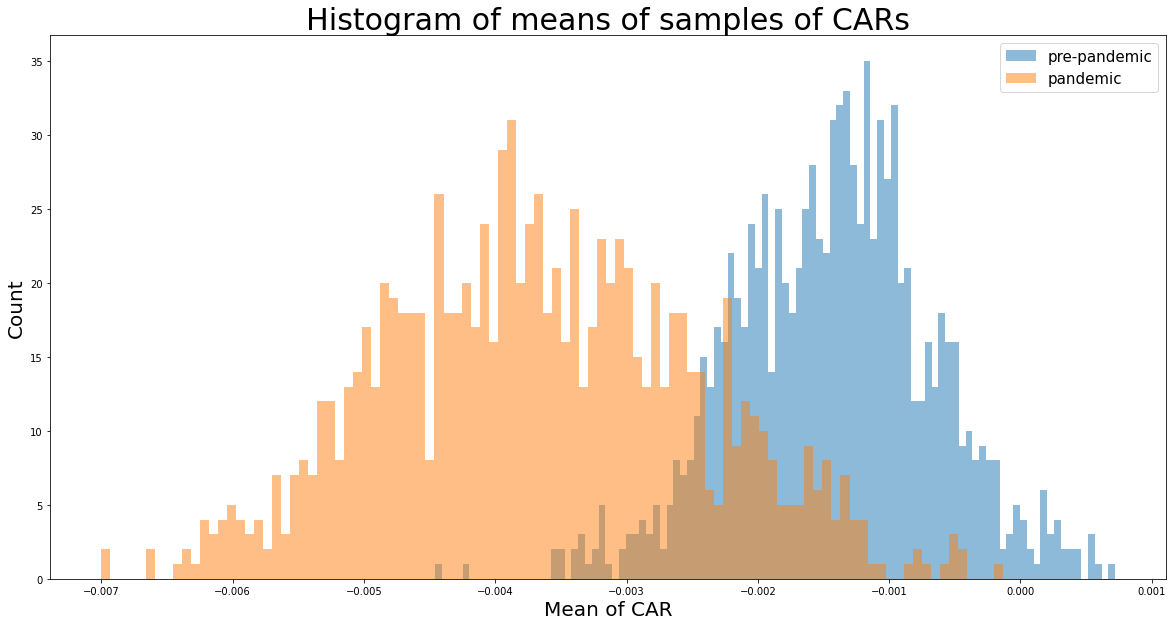

In [167]:
# approach recommended by Aussenegg: Simulate mean differences
ttest_results = []
ttest_index = []

for type_ in types_of_interest:
    for cp in CAR_periods.keys():

        print(type_)
        print(cp)
        l_CAR, r_CAR = CAR_periods[cp]

        left, right = investigation_periods["Pre-Pandemic"]
        AR_prepandemic = df_abnormal_returns.loc[:,:,type_,left:right].values
        sample_CAR_prepandemic = AR_prepandemic[:,l_CAR:(r_CAR+1)].sum(axis=1)

        left, right = investigation_periods["Pandemic"]
        AR_pandemic = df_abnormal_returns.loc[:,:,type_,left:right].values
        sample_CAR_pandemic = AR_pandemic[:,l_CAR:(r_CAR+1)].sum(axis=1)


        CAAR_pp = sample_CAR_prepandemic.mean()
        CAAR_p = sample_CAR_pandemic.mean()
        CAAR_diff = CAAR_p - CAAR_pp

        sample_size = 1000
        diffs = []
        subsample_means_CAR_prepandemic = []
        subsample_means_CAR_pandemic = []
        for i in range(1000):
            # pick subsample
            subsample_pp = np.random.choice(sample_CAR_prepandemic, sample_size, replace=True)
            subsample_p = np.random.choice(sample_CAR_pandemic, sample_size, replace=True)
            diff = subsample_p-subsample_pp
            subsample_means_CAR_prepandemic.append(subsample_pp.mean())
            subsample_means_CAR_pandemic.append(subsample_p.mean())
            diffs.append(diff.mean())



        fig = plt.figure(figsize=(fig_height, 10))
        plt.hist(subsample_means_CAR_prepandemic,bins = 100, alpha = 0.5)
        plt.hist(subsample_means_CAR_pandemic,bins = 100, alpha = 0.5)
        plt.legend(["pre-pandemic", "pandemic"], fontsize = tick_size)
        plt.xlabel("Mean of CAR", fontsize=label_size)
        plt.ylabel("Count", fontsize=label_size)

        plt.title("Histogram of means of samples of CARs", fontsize=title_size)
        plt.savefig(f"data/{NAME}/visualisations/histogram_mean_CARs_pp_p_{type_}_{cp}.png")

        clear_output(wait=True)
        plt.show()

        ttest = stats.ttest_1samp(diffs, 0)

        #test_results.append((grank_result.pvalue, grank_result.statistic, adj_grank_result.pvalue, adj_grank_result.statistic, adjBMP_result.pvalue, adjBMP_result.statistic))
        ttest_results.append((CAAR_diff, ttest.pvalue, ttest.statistic))
        ttest_index.append((type_, cp))

In [170]:
ttest_df = pd.DataFrame(ttest_results, index=pd.MultiIndex.from_tuples(ttest_index, names=["Trade Type", "CAR period"]))
ttest_df.columns = ["Δ CAAR", "p-value", "t-statistic"]
print(ttest_df.round(10).to_latex())

\begin{tabular}{llrrr}
\toprule
            &        &  Difference CAAR &  p-value &  t-statistic \\
Trade Type & CAR period &                  &          &              \\
\midrule
P - Purchase & [-20, 20] &        -0.050612 &      0.0 &  -136.297763 \\
            & [-20, -1] &        -0.042287 &      0.0 &  -154.721661 \\
            & [0, 20] &        -0.008325 &      0.0 &   -36.242026 \\
            & [0, 5] &         0.004553 &      0.0 &    26.755446 \\
            & [0, 1] &         0.004300 &      0.0 &    39.322574 \\
S - Sale & [-20, 20] &        -0.004152 &      0.0 &   -16.316919 \\
            & [-20, -1] &         0.004974 &      0.0 &    30.712446 \\
            & [0, 20] &        -0.009126 &      0.0 &   -52.165829 \\
            & [0, 5] &        -0.003812 &      0.0 &   -41.939495 \\
            & [0, 1] &        -0.001630 &      0.0 &   -31.223011 \\
S - Sale+OE & [-20, 20] &        -0.012156 &      0.0 &   -54.904237 \\
            & [-20, -1] &         0.002011 &

C:\Users\thoma\AppData\Local\Temp\ipykernel_21388\809907968.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ttest_df.round(10).to_latex())


In [ ]:
test_results = []
test_index = []

for per in investigation_periods.keys():
    for type_ in types_of_interest:
        for CAR_period_name in CAR_periods.keys():

            print(per)
            print(type_)
            print(CAR_period_name)
            CAR_period = CAR_periods[CAR_period_name]

            left, right = investigation_periods[per]
            AR = df_abnormal_returns.loc[:,:,type_, left:right].values
            eps = df_eps.loc[:,:,type_,left:right].values
            R_market_estimation_window = df_estimation_window_market_return.loc[:,:,type_,left:right].values
            R_market_event_window = df_event_window_market_return.loc[:,:,type_,left:right].values
            grank_result = grank(AR, eps, R_market_estimation_window, R_market_event_window, CAR_period, False)
            adj_grank_result = grank(AR, eps, R_market_estimation_window, R_market_event_window, CAR_period, True)
            adjBMP_result = adjBMP(AR, eps, R_market_estimation_window, R_market_event_window, CAR_period)
            CAAR = AR.sum(axis=1).mean() # scalar value
            test_results.append((CAAR, grank_result.pvalue, grank_result.statistic, adj_grank_result.pvalue, adj_grank_result.statistic, adjBMP_result.pvalue, adjBMP_result.statistic))
            #test_results.append((grank_result.pvalue, grank_result.statistic, adjBMP_result.pvalue, adjBMP_result.statistic))
            test_index.append((per, type_, CAR_period_name))

In [ ]:
test_results_df = pd.DataFrame(test_results, index=pd.MultiIndex.from_tuples(test_index, names=["Investigation Period", "Trade Type", "CAR Period"]))
test_results_df.columns = ["CAAR", "GRANK p-value", "GRANK t-statistic", "adj-GRANK p-value", "adj-GRANK statistic", "adjBMP p-value", "adjBMP t-statistic"]

In [ ]:
test_results_df.to_pickle(f"data/{NAME}/statistical_tests/GRANK_ADJBMP.pkl")

In [ ]:
test_results_df.to_excel(f"data/{NAME}/statistical_tests/statistical_tests_results.xlsx")

#### Export information to latex

In [ ]:
test_results_df

### Visualize how active Directors Dealings Are
Should move this to somewhere else
Want visual confirmation that Directors have changed behaviour during the times of Covid (Hypothesis 3)

In [ ]:
all_insider_trades = companies[0].insider_data_df.head(0)
from tqdm import tqdm
#for j in tqdm(range(len(companies[:200]))):
for j in tqdm(range(len(companies))):
    all_insider_trades = pd.concat([all_insider_trades, companies[j].insider_data_df])#  @ gunnar very nice asymptotic runtime
    
all_insider_trades['FilingDateTrunc'] = all_insider_trades['FilingDate'].dt.date
all_insider_trades.groupby('FilingDateTrunc')['FilingDate'].count().plot()
plt.show()
all_insider_trades.to_csv('AllTradesForExcelGSK.csv')

all_insider_trades.groupby('FilingDateTrunc')['Value'].sum().plot()
plt.show()
all_insider_trades.groupby('FilingDateTrunc')['Value'].mean().plot()
plt.show()
plt.hist(all_insider_trades['FilingDateTrunc'])